In [32]:
path1 = "DPF-Merge/logs_maze_runtime1/logs/5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_0.01/data"
path2 = "DPF-Merge/logs_maze_runtime1/logs/5_NF^False_SDPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_1e-05_elbo_0.01/data"
path3 = "DPF-Merge/logs_maze_runtime1/logs/5_NF^False_SDPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_1e-06_elbo_0.1/data"
savepath = "result/traj_maze1.png"

In [4]:
path1 = "DPF-Merge/logs_traj1001/5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_1e-05_elbo_0.001_mix_split_0.1/data"
# path2 = "DPF-Merge/logs_traj100/de_elbo_5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_1e-05_elbo_0.001_mix_split_0.1/data"
path2 = "DPF-Merge/logs_traj1001/5_NF^False_SDPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_0.0001_elbo_0.001_mix_split_0.1/data"
path3 = "DPF-Merge/logs_traj1001/lstm_5_NF^False_DPF_0.25_0.05_resample^soft_cos_maze_nav01_0.1_0.01/data"
savepath = "result/traj_maze1.png"

In [7]:
path1 = "DPF-Merge/logs_traj1001/5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav02_0.1_1e-05_elbo_0.001_mix_split_0.1/data"
# path2 = "DPF-Merge/logs_traj100/de_elbo_5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_1e-05_elbo_0.001_mix_split_0.1/data"
path2 = "DPF-Merge/logs_traj1001/5_NF^False_SDPF_0.25_0.001_resample^soft_cos_maze_nav02_0.1_0.0001_elbo_0.001_mix_split_0.1/data"
path3 = "DPF-Merge/logs_traj1001/lstm_5_NF^False_DPF_0.25_0.05_resample^soft_cos_maze_nav02_0.1_0.01/data"
savepath = "result/traj_maze2.png"

In [10]:
path1 = "DPF-Merge/logs_traj1001/5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav03_0.1_1e-05_elbo_0.001_mix_split_0.1/data"
# path2 = "DPF-Merge/logs_traj100/de_elbo_5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_1e-05_elbo_0.001_mix_split_0.1/data"
path2 = "DPF-Merge/logs_traj1001/5_NF^False_SDPF_0.25_0.001_resample^soft_cos_maze_nav03_0.1_0.0001_elbo_0.001_mix_split_0.1/data"
path3 = "DPF-Merge/logs_traj1001/lstm_5_NF^False_DPF_0.25_0.05_resample^soft_cos_maze_nav03_0.1_0.01/data"
savepath = "result/traj_maze3.png"

In [11]:
import numpy as np
import os

test_data1 = np.load(os.path.join(path1, 'test_result.npz'))
loss_buffer1=test_data1['loss_buffer']
test_data2 = np.load(os.path.join(path2, 'test_result.npz'))
loss_buffer2=test_data2['loss_buffer']
test_data3 = np.load(os.path.join(path3, 'test_result.npz'))
loss_buffer3=test_data3['loss_buffer']

print(np.mean(loss_buffer1))
print(np.mean(loss_buffer2))
print(np.mean(loss_buffer3))
# particle_list=test_data['particle_list']
# particle_weight_list=test_data['particle_weight_list']
# likelihood_list=test_data['likelihood_list']
# state=test_data['state']
# predictions=test_data['pred']
# images=test_data['images']
# noise=test_data['noise']
list1=loss_buffer1[999]
print(list1.shape)

8.30541
8.568292
10.166676
(99,)


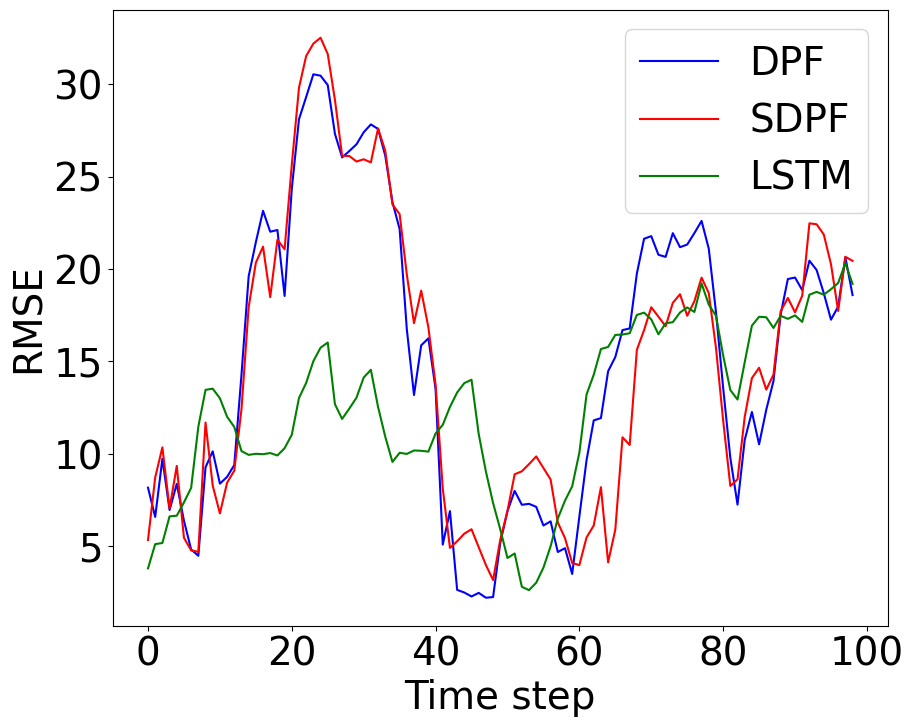

In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import re


def plot_multiple(lists, labels, colors, x_label='Epoch', y_label='RMSE', save_name='figure.png', legend_loc='upper right'):
    assert len(lists) == len(labels), "Number of lists must equal the number of labels"
    if colors:
        assert len(lists) == len(colors), "Number of lists must equal the number of colors"

    plt.figure(figsize=(10, 8))

    for idx, (list_, label) in enumerate(zip(lists, labels)):
        if colors:
            plt.plot(list_, label=label, color=colors[idx])
        else:
            plt.plot(list_, label=label)

    plt.xlabel(x_label, fontsize=28)
    plt.ylabel(y_label, fontsize=28)
    plt.legend(loc=legend_loc, fontsize=28, ncol=1)
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)

    plt.savefig(save_name, bbox_inches='tight', pad_inches=0.05)
    plt.show()

list1=loss_buffer1[999]
list2=loss_buffer2[999]
list3=loss_buffer3[999]

plot_multiple([list1, list2, list3],
              ["DPF", "SDPF", "LSTM"],
              colors=['blue', 'red', 'green'],  # Specify the colors here
              x_label='Time step',
              y_label='RMSE',
              save_name=savepath,
             legend_loc='upper right')